# Xarray

![logo](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

`xarray` (antigamente conhecido como xray) é um pacote Python que faz trabalhar com arrays multi-dimensionais simples, efficente e divertido!

Arrays multi-dimensionais são uma parte essencial em computação científica. Eles são encontrados em uma grande variedade de áreas como física, astronômia, geociências, e etc. No Python, NumPy proporciona a estrutura fundamental para trabalhar com arrays multi-dimensionais. No entanto, geralmente os conjuntos de dados são mais do que números puros; eles possuem nomes (labels) que encorporam como o array é mapeado no espaço, tempo, etc.

Introduzindo dimensões, coordenadas e atributos em cima de arrays NumPy, xarray é capaz de entender esses labels e usa-lo para proporcionar uma experiência mais intuitiva, concisa e menos proícia para erros. Xarray também proporciona uma variedade de funções para análise de dados e visualização. Xarray foi inspirado e usa muito do que foi desenvolvido para o pandas. Xarray pode ler e escrever dados dos formatos mais comuns e é particularmente feito para funcionar bem com arquivos netCDF.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

## Estrutura Básica

`xarray.DataArray` possue as seguintes propriedades:
- `values`: Um numpy.ndarray com os valores do array
- `dims`: Nome das dimensões para cada eixo (e.g., ('x', 'y', 'z'))
- `coords`: Um dicionário com as coordenadas para cada eixo (e.g., Array unidimensional, objeto tipo datetime ou strings)
- `attrs`: Dicionário para os metadados arbitrários.

In [2]:
data = np.random.rand(4, 3)

data

array([[0.33557259, 0.72050439, 0.0938721 ],
       [0.4517429 , 0.7844295 , 0.18221019],
       [0.69622385, 0.57603359, 0.44792764],
       [0.2018392 , 0.13267819, 0.70820422]])

In [3]:
locs = ['IA', 'IL', 'IN']

times = pd.date_range('2000-01-01', periods=4)

foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])

foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.335573, 0.720504, 0.093872],
       [0.451743, 0.784429, 0.18221 ],
       [0.696224, 0.576034, 0.447928],
       [0.201839, 0.132678, 0.708204]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) |S2 'IA' 'IL' 'IN'

Também pode ser criado da seguinte maneira:

In [4]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.335573, 0.720504, 0.093872],
       [0.451743, 0.784429, 0.18221 ],
       [0.696224, 0.576034, 0.447928],
       [0.201839, 0.132678, 0.708204]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) |S2 'IA' 'IL' 'IN'

In [5]:
foo.values

array([[0.33557259, 0.72050439, 0.0938721 ],
       [0.4517429 , 0.7844295 , 0.18221019],
       [0.69622385, 0.57603359, 0.44792764],
       [0.2018392 , 0.13267819, 0.70820422]])

In [6]:
foo.dims

('time', 'space')

In [7]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) |S2 'IA' 'IL' 'IN'

In [8]:
foo.attrs

OrderedDict()

In [9]:
foo.name = 'foo'

foo.attrs = {'created_by': 'Batman'}

In [10]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.335573, 0.720504, 0.093872],
       [0.451743, 0.784429, 0.18221 ],
       [0.696224, 0.576034, 0.447928],
       [0.201839, 0.132678, 0.708204]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) |S2 'IA' 'IL' 'IN'
Attributes:
    created_by:  Batman

`xarray.Dataset` é o equivalente do pandas DataFrame. Possui as seguintes propriedades:

- `dims`: Um dicionário mapeando as coordenadas e o tamanho de cada coordenada (e.g., {'x': 6, 'y': 6, 'time': 8})
- `data_vars`: Um dicionário com variáveis em DataArrays
- `coords`: Um dicionário com as coordenadas para cada eixo (e.g., Array unidimensional, objeto tipo datetime ou strings)
- `attrs`: Dicionário para os metadados arbitrários.

In [11]:
temp = 15 + 8 * np.random.randn(2, 2, 3)

precip = 10 * np.random.rand(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, -99.23]]

lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset({'temperature': (['x', 'y', 'time'],  temp),
                 'precipitation': (['x', 'y', 'time'], precip)},
                 coords={'lon': (['x', 'y'], lon),
                         'lat': (['x', 'y'], lat),
                         'time': pd.date_range('2014-09-06', periods=3)})

ds

<xarray.Dataset>
Dimensions:        (time: 3, x: 2, y: 2)
Coordinates:
    lat            (x, y) float64 42.25 42.21 42.63 42.59
    lon            (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time           (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    precipitation  (x, y, time) float64 1.773 3.574 2.795 9.772 4.814 3.776 ...
    temperature    (x, y, time) float64 9.022 16.86 2.601 4.43 8.765 26.29 ...

In [12]:
xr.Dataset({'bar': foo})

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) |S2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.3356 0.7205 0.09387 0.4517 0.7844 ...

In [13]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 9.021737, 16.862643,  2.601469],
        [ 4.430099,  8.765469, 26.292993]],

       [[12.08042 , 28.34787 , 11.719901],
        [20.348202, 24.203076,  7.639459]]])
Coordinates:
    lat      (x, y) float64 42.25 42.21 42.63 42.59
    lon      (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

In [14]:
ds.data_vars

Data variables:
    precipitation  (x, y, time) float64 1.773 3.574 2.795 9.772 4.814 3.776 ...
    temperature    (x, y, time) float64 9.022 16.86 2.601 4.43 8.765 26.29 ...

## Trabalhando com um netCDF

Vamos abrir agora um arquivo netCDF de exemplo para mostrar como tirar proveito das facilidades do `xarray`.

In [15]:
ds = xr.open_dataset('data/xarray_teste.nc')

ds

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 161, time: 92)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-27T21:00:00 2018-12-28 ...
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
Data variables:
    prec     (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    tmax     (time, lat, lon) float64 289.4 289.3 289.3 289.3 289.2 289.2 ...
    tmin     (time, lat, lon) float64 289.2 289.2 289.3 289.2 289.2 289.2 ...
    10u      (time, lat, lon) float64 2.438 2.748 2.998 3.248 3.658 4.308 ...
    10v      (time, lat, lon) float64 9.484 9.574 9.624 9.734 9.954 10.12 ...

In [16]:
ds.time

<xarray.DataArray 'time' (time: 92)>
array(['2018-12-27T21:00:00.000000000', '2018-12-28T00:00:00.000000000',
       '2018-12-28T03:00:00.000000000', '2018-12-28T06:00:00.000000000',
       '2018-12-28T09:00:00.000000000', '2018-12-28T12:00:00.000000000',
       '2018-12-28T15:00:00.000000000', '2018-12-28T18:00:00.000000000',
       '2018-12-28T21:00:00.000000000', '2018-12-29T00:00:00.000000000',
       '2018-12-29T03:00:00.000000000', '2018-12-29T06:00:00.000000000',
       '2018-12-29T09:00:00.000000000', '2018-12-29T12:00:00.000000000',
       '2018-12-29T15:00:00.000000000', '2018-12-29T18:00:00.000000000',
       '2018-12-29T21:00:00.000000000', '2018-12-30T00:00:00.000000000',
       '2018-12-30T03:00:00.000000000', '2018-12-30T06:00:00.000000000',
       '2018-12-30T09:00:00.000000000', '2018-12-30T12:00:00.000000000',
       '2018-12-30T15:00:00.000000000', '2018-12-30T18:00:00.000000000',
       '2018-12-30T21:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2018-1

In [17]:
ds.sel(time=slice('2019-01-01', '2019-01-05'))

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 161, time: 40)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-01T03:00:00 ...
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
Data variables:
    prec     (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    tmax     (time, lat, lon) float64 290.0 290.0 290.0 290.0 290.0 290.0 ...
    tmin     (time, lat, lon) float64 289.9 289.9 289.9 289.9 289.9 289.8 ...
    10u      (time, lat, lon) float64 2.99 3.13 3.29 3.44 3.59 3.72 3.71 ...
    10v      (time, lat, lon) float64 7.711 8.161 8.651 9.221 9.771 10.1 ...

In [18]:
ds.isel(time=0)

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 161)
Coordinates:
    time     datetime64[ns] 2018-12-27T21:00:00
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
Data variables:
    prec     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    tmax     (lat, lon) float64 289.4 289.3 289.3 289.3 289.2 289.2 289.4 ...
    tmin     (lat, lon) float64 289.2 289.2 289.3 289.2 289.2 289.2 289.3 ...
    10u      (lat, lon) float64 2.438 2.748 2.998 3.248 3.658 4.308 4.878 ...
    10v      (lat, lon) float64 9.484 9.574 9.624 9.734 9.954 10.12 10.05 ...

In [19]:
ds.sel(lat=-23.6821604, lon=-46.8755003) # São Paulo

KeyError: -23.6821604

In [20]:
ds.sel(lat=-23.6821604, lon=-46.8755003, method='nearest')

<xarray.Dataset>
Dimensions:  (time: 92)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-27T21:00:00 2018-12-28 ...
    lat      float64 -23.75
    lon      float64 -47.0
Data variables:
    prec     (time) float64 1.272e-14 1.272e-14 0.0 0.0 0.0 0.0 0.4375 5.375 ...
    tmax     (time) float64 296.4 296.4 290.7 290.7 290.0 297.8 300.0 300.8 ...
    tmin     (time) float64 293.9 290.6 289.6 289.4 289.3 289.3 296.7 296.7 ...
    10u      (time) float64 -2.162 -1.668 -1.295 -1.02 -0.7769 -0.5604 ...
    10v      (time) float64 2.564 1.319 0.4281 -0.1145 0.05091 -1.107 1.058 ...

<div class="alert alert-block alert-success">
<b>Em que situação isso pode ser usado?</b> Para filtrar seus dados apenas na área ou no tempo que você quer para fazer uma análise ou comparação. O último caso, por exemplo, pode ser usado para selecionar o ponto de grade do modelo mais próximo de uma dada estação para comparação.
</div>

In [31]:
ds_ts = ds.sel(lat=-23.6821604, lon=-46.8755003, method='nearest')

df = ds_ts.to_dataframe()
df.head()

,10u,10v,lat,lon,prec,tmax,tmin
time,,,,,,,
2018-12-27 21:00:00,-2.162456,2.564293,-23.75,-47.0,1.271899e-14,296.445160,293.887115
2018-12-28 00:00:00,-1.668428,1.319224,-23.75,-47.0,1.271899e-14,296.445190,290.630249
2018-12-28 03:00:00,-1.294783,0.428114,-23.75,-47.0,0.000000e+00,290.699738,289.620758
2018-12-28 06:00:00,-1.020208,-0.114490,-23.75,-47.0,0.000000e+00,290.700378,289.355225
2018-12-28 09:00:00,-0.776885,0.050908,-23.75,-47.0,0.000000e+00,289.969604,289.270020


Os dados também podem ser mascarados conforme uma condição que você quer:

In [42]:
ds

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 161, time: 92)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-27T21:00:00 2018-12-28 ...
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
Data variables:
    prec     (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    tmax     (time, lat, lon) float64 289.4 289.3 289.3 289.3 289.2 289.2 ...
    tmin     (time, lat, lon) float64 289.2 289.2 289.3 289.2 289.2 289.2 ...
    10u      (time, lat, lon) float64 2.438 2.748 2.998 3.248 3.658 4.308 ...
    10v      (time, lat, lon) float64 9.484 9.574 9.624 9.734 9.954 10.12 ...

In [43]:
ds.where(ds['10u'] > 3)

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 161, time: 92)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-27T21:00:00 2018-12-28 ...
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
Data variables:
    prec     (time, lat, lon) float64 nan nan nan 0.0 0.0 0.0 0.0 0.0 0.0 ...
    tmax     (time, lat, lon) float64 nan nan nan 289.3 289.2 289.2 289.4 ...
    tmin     (time, lat, lon) float64 nan nan nan 289.2 289.2 289.2 289.3 ...
    10u      (time, lat, lon) float64 nan nan nan 3.248 3.658 4.308 4.878 ...
    10v      (time, lat, lon) float64 nan nan nan 9.734 9.954 10.12 10.05 ...

## Resampling dos dados

Como o `xarray` foi construído em cima do `pandas` temos as mesmas funções de resample para séries temporais. A utilidade de usar o `xarray` é que você pode fazer isso em séries 3D ou 4D.

In [23]:
ds_day = ds['prec'].resample('D', how='sum', dim='time')

ds_day

/home/rafael/anaconda/envs/middleearth/lib/python2.7/site-packages/xarray/core/common.py:547: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<xarray.DataArray 'prec' (time: 17, lat: 165, lon: 161)>
array([[[0.    , 0.    , ..., 0.    , 0.    ],
        [0.    , 0.    , ..., 0.    , 0.    ],
        ...,
        [0.    , 0.    , ..., 0.    , 0.    ],
        [0.    , 0.    , ..., 0.0625, 0.0625]],

       [[0.    , 0.    , ..., 0.3125, 0.3125],
        [0.    , 0.    , ..., 0.25  , 0.25  ],
        ...,
        [0.    , 0.    , ..., 0.375 , 0.375 ],
        [0.    , 0.    , ..., 0.3125, 0.375 ]],

       ...,

       [[0.4375, 0.375 , ..., 0.4375, 0.375 ],
        [0.4375, 0.3125, ..., 0.5   , 0.5   ],
        ...,
        [0.1875, 0.    , ..., 0.25  , 0.25  ],
        [2.8125, 0.5625, ..., 0.25  , 0.25  ]],

       [[0.    , 0.    , ..., 0.125 , 0.125 ],
        [0.    , 0.    , ..., 0.25  , 0.1875],
        ...,
        [0.    , 0.    , ..., 0.4375, 0.25  ],
        [0.    , 0.    , ..., 0.3125, 0.3125]]])
Coordinates:
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -7

Você pode aplicar funções como `max`, `min` e `mean` usando os nomes das coordenadas em vez do eixo do array

In [25]:
ds['tmax'].mean(dim=['time'])

<xarray.DataArray 'tmax' (lat: 165, lon: 161)>
array([[289.250618, 289.2879  , 289.344203, ..., 292.450398, 292.412683,
        292.396269],
       [289.37942 , 289.401487, 289.44116 , ..., 292.586923, 292.566379,
        292.562572],
       [289.457355, 289.489966, 289.545724, ..., 292.772139, 292.761705,
        292.745074],
       ...,
       [298.954203, 304.557573, 299.820724, ..., 299.696704, 299.693118,
        299.679748],
       [299.063986, 304.204096, 302.762249, ..., 299.635291, 299.636703,
        299.625941],
       [298.479857, 303.111703, 304.409206, ..., 299.593443, 299.566596,
        299.552791]])
Coordinates:
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...

In [26]:
ds['tmax'].mean(dim=['lat', 'lon'])

<xarray.DataArray 'tmax' (time: 92)>
array([301.530957, 301.544629, 296.886637, 296.897908, 295.312146, 297.463467,
       300.748515, 302.174367, 301.769056, 301.781882, 297.142357, 297.150669,
       295.445357, 297.516853, 300.830315, 302.313703, 301.98423 , 301.998039,
       297.324462, 297.328826, 295.50627 , 297.481152, 300.628531, 302.102579,
       301.658188, 301.669547, 296.96554 , 296.970343, 295.254664, 297.327071,
       300.765533, 302.411197, 302.088273, 302.097215, 297.409071, 297.416764,
       295.747235, 297.837695, 301.27826 , 302.779409, 302.42492 , 302.432782,
       297.650205, 297.65898 , 296.034158, 298.104668, 301.471045, 302.920995,
       302.558986, 302.566224, 297.760308, 297.770782, 296.181211, 298.204032,
       301.209372, 302.575862, 302.108344, 302.12146 , 297.272917, 297.281675,
       295.516481, 297.329547, 300.059507, 301.421552, 301.016641, 301.026845,
       296.518107, 296.522428, 294.92697 , 296.83856 , 299.71222 , 301.15378 ,
       300.8235

A função `groupby` também pode ser usada:

In [28]:
ds['tmin'].groupby('time.month').mean(dim=['time'])

<xarray.DataArray 'tmin' (month: 2, lat: 165, lon: 161)>
array([[[288.916338, 288.977865, ..., 291.961932, 291.937693],
        [289.049899, 289.101593, ..., 292.130067, 292.116678],
        ...,
        [293.690916, 297.483627, ..., 299.51973 , 299.500237],
        [293.315832, 297.027695, ..., 299.472779, 299.450916]],

       [[288.877069, 288.897978, ..., 292.076462, 292.081009],
        [288.987676, 289.002824, ..., 292.221314, 292.231314],
        ...,
        [294.359492, 298.307374, ..., 299.262223, 299.247069],
        [293.989495, 297.765553, ..., 299.192219, 299.168586]]])
Coordinates:
  * lat      (lat) float64 -35.0 -34.75 -34.5 -34.25 -34.0 -33.75 -33.5 ...
  * lon      (lon) float64 -75.0 -74.75 -74.5 -74.25 -74.0 -73.75 -73.5 ...
  * month    (month) int64 1 12

## Facilidades para fazer plots com o xarray

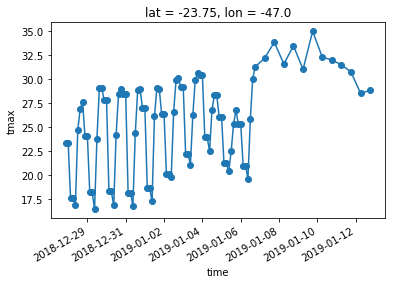

In [46]:
ds_ts = ds.sel(lat=-23.6821604, lon=-46.8755003, method='nearest')

(ds_ts['tmax'] - 273.15).plot(marker='o')

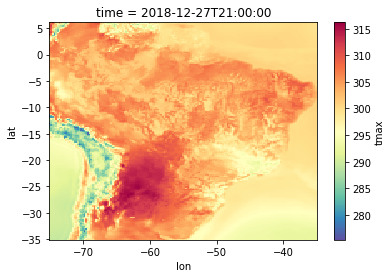

In [49]:
ds['tmax'].isel(time=0).plot(cmap='Spectral_r')

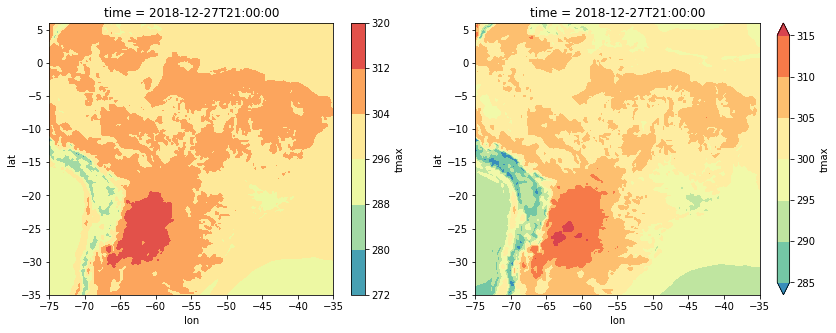

In [59]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,5))

ds['tmax'].isel(time=0).plot.contourf(ax=ax1, cmap='Spectral_r')
ds['tmax'].isel(time=0).plot.contourf(ax=ax2, cmap='Spectral_r', robust=True)

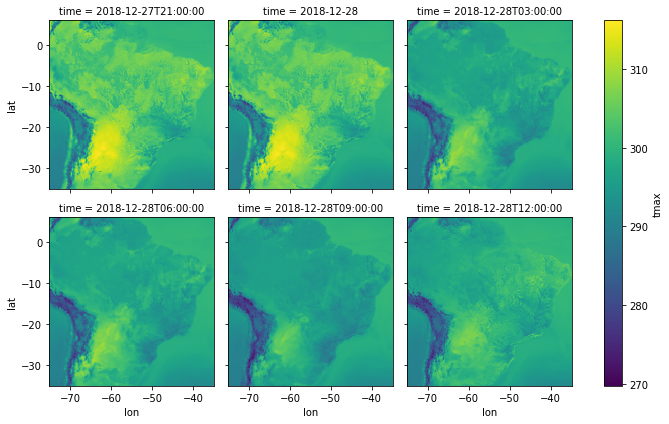

In [55]:
ds['tmax'].isel(time=slice(0,6)).plot(x='lon', y='lat', col='time', col_wrap=3)

# Cartopy

Cartopy é um pacote Python desenhada para processamento de dados geoespaciais para produzir mapas e outras análises. Ele faz uso das bibliotecas PROJ.4, NumPy e Shapely e foi construído em cima do Matplotlib. Algumas dos atrativos do cartopy são sua definição de projeções orientada a objetos, e sua habilidade de transformar pontos, linhas, vetores, polígonos e imagens entre essas projeções.

In [60]:
import cartopy.crs as ccrs

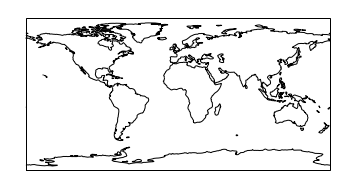

In [61]:
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

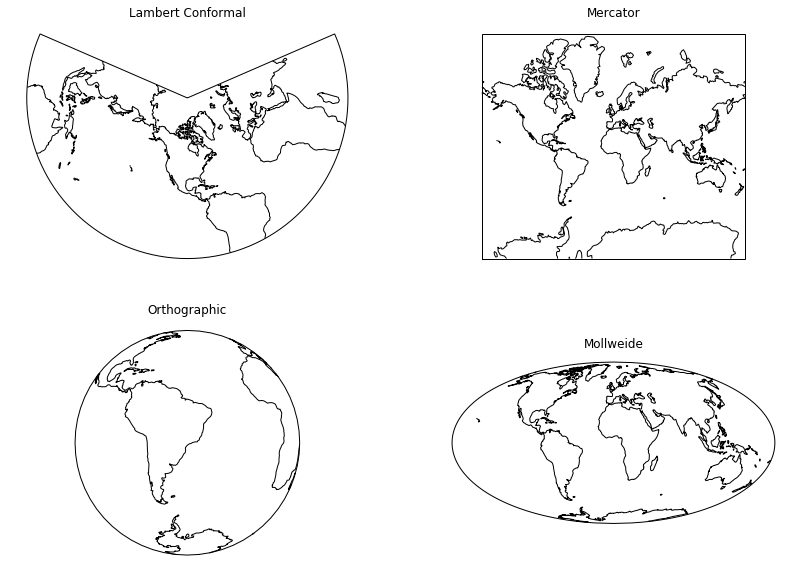

In [68]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221, projection=ccrs.LambertConformal())
ax2 = fig.add_subplot(222, projection=ccrs.Mercator())
ax3 = fig.add_subplot(223, projection=ccrs.Orthographic(central_latitude=-23.5, central_longitude=-47.5))
ax4 = fig.add_subplot(224, projection=ccrs.Mollweide())

axarr = [ax1, ax2, ax3, ax4]
titles = ['Lambert Conformal', 'Mercator', 'Orthographic', 'Mollweide']

for ax, title in zip(axarr, titles):
    ax.coastlines()
    ax.set_title(title)

## Melhorando os plots com a interface `feature`

In [69]:
import cartopy.feature as cfeature

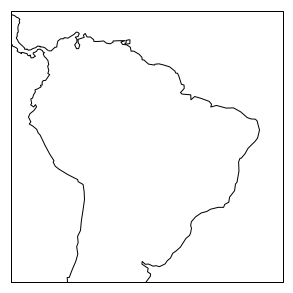

In [87]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

# focando em uma região específica 
subset = [-85, -30, -35, 15]

ax.set_extent(subset)
ax.coastlines()

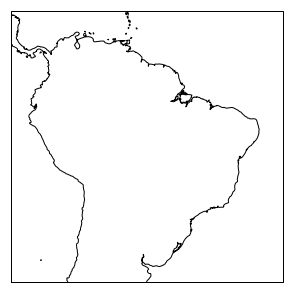

In [88]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

# focando em uma região específica 
ax.set_extent(subset)
ax.coastlines('50m') # aumentando a resolução da linha de costa

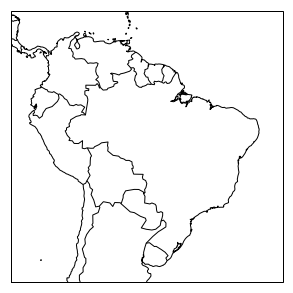

In [91]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

# focando em uma região específica 
ax.set_extent(subset)
ax.coastlines('50m') # aumentando a resolução da linha de costa
ax.add_feature(cfeature.BORDERS) # adicionado a divisão de países

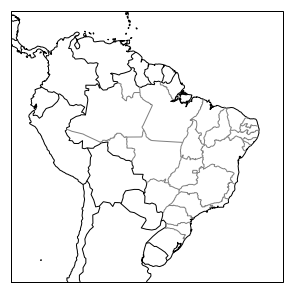

In [92]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

# focando em uma região específica 
ax.set_extent(subset)
ax.coastlines('50m') # aumentando a resolução da linha de costa
ax.add_feature(cfeature.BORDERS) # adicionado a divisão de países

states_provinces = cfeature.NaturalEarthFeature( # https://www.naturalearthdata.com/downloads/
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray') # adiciona os estados

In [125]:
def my_features(ax, subset, res):
    # focando em uma região específica 
    ax.set_extent(subset)
    ax.coastlines(res) # aumentando a resolução da linha de costa
    
    cfeature.BORDERS.scale = res
    ax.add_feature(cfeature.BORDERS) # adicionado a divisão de países

    states_provinces = cfeature.NaturalEarthFeature( # https://www.naturalearthdata.com/downloads/
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale=res,
            facecolor='none')

    ax.add_feature(states_provinces, edgecolor='k') # adiciona os estados

/home/rafael/anaconda/envs/middleearth/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


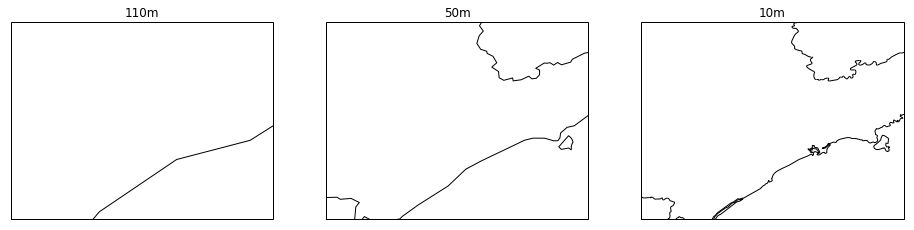

In [126]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5), subplot_kw={'projection': ccrs.PlateCarree()})

my_features(ax1, [-49, -45, -25, -22], '110m')
my_features(ax2, [-49, -45, -25, -22], '50m')
my_features(ax3, [-49, -45, -25, -22], '10m')

axarr = [ax1, ax2, ax3]
titles = ['110m', '50m', '10m']

for ax, title in zip(axarr, titles):
    ax.set_title(title)

## Adicionando shapefiles no mapa

In [127]:
from cartopy.io.shapereader import Reader

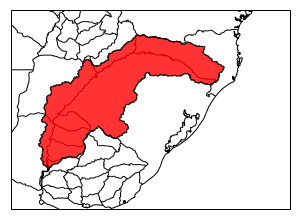

In [133]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': ccrs.PlateCarree()})

shpname = 'shapefiles/Uruguai-Basin-BAU.shp'
shp = Reader(shpname).geometries()

my_features(ax, [-60, -46, -35, -25], '10m')
ax.add_geometries(shp, ccrs.PlateCarree(), edgecolor='k', facecolor='red', alpha=0.8)